# Plot flux power predictions from Arinyo model

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import rcParams
rcParams["savefig.dpi"] = 140
rcParams["figure.dpi"] = 140
rcParams["font.size"] = 10
import numpy as np
import matplotlib.pyplot as plt
from lace.cosmo import camb_cosmo
from lace_manager.p3d import model_p3d_arinyo

In [3]:
# specify cosmology
cosmo=camb_cosmo.get_cosmology()
camb_cosmo.print_info(cosmo)
zs=[0.0,2.4]
camb_results=camb_cosmo.get_camb_results(cosmo,zs=zs)

H0 = 6.7000E+01, Omega_b h^2 = 2.2000E-02, Omega_c h^2 = 1.2000E-01, Omega_k = 0.0000E+00, Omega_nu h^2 = 0.0000E+00, A_s = 2.1000E-09, n_s = 9.6500E-01, alpha_s = 0.0000E+00


In [4]:
# construct Arinyo model for flux P3D
arinyo=model_p3d_arinyo.ArinyoModel(cosmo,zs,camb_results)

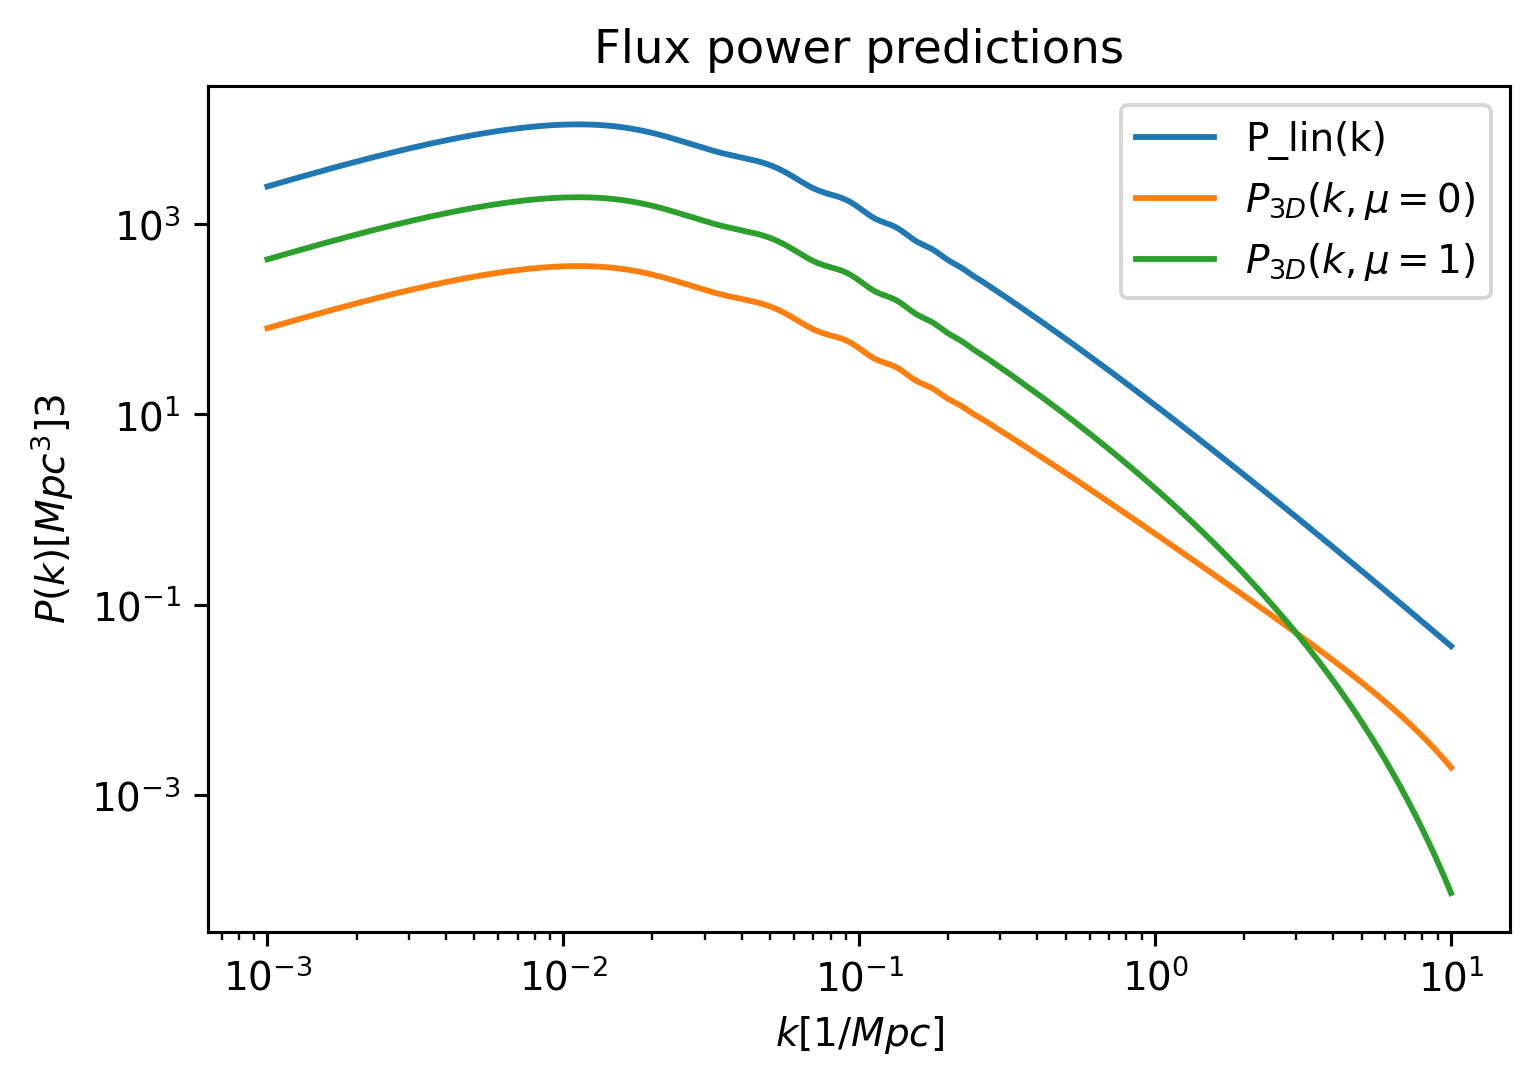

In [5]:
# make plot for a couple of mu bins
z=2.4
lin_k=np.logspace(-3,1,1000)
lin_p=arinyo.linP_Mpc(z,lin_k)
plt.title(r"Flux power predictions")
plt.xlabel(r"$k [1/Mpc]$")
plt.ylabel(r"$P(k) [Mpc^3]3$")
plt.loglog(lin_k,lin_p,label='P_lin(k)')
plt.loglog(lin_k,arinyo.P3D_Mpc(z,lin_k,mu=0.0),label=r'$P_{3D}(k,\mu=0)$')
plt.loglog(lin_k,arinyo.P3D_Mpc(z,lin_k,mu=1.0),label=r'$P_{3D}(k,\mu=1)$')
plt.legend();

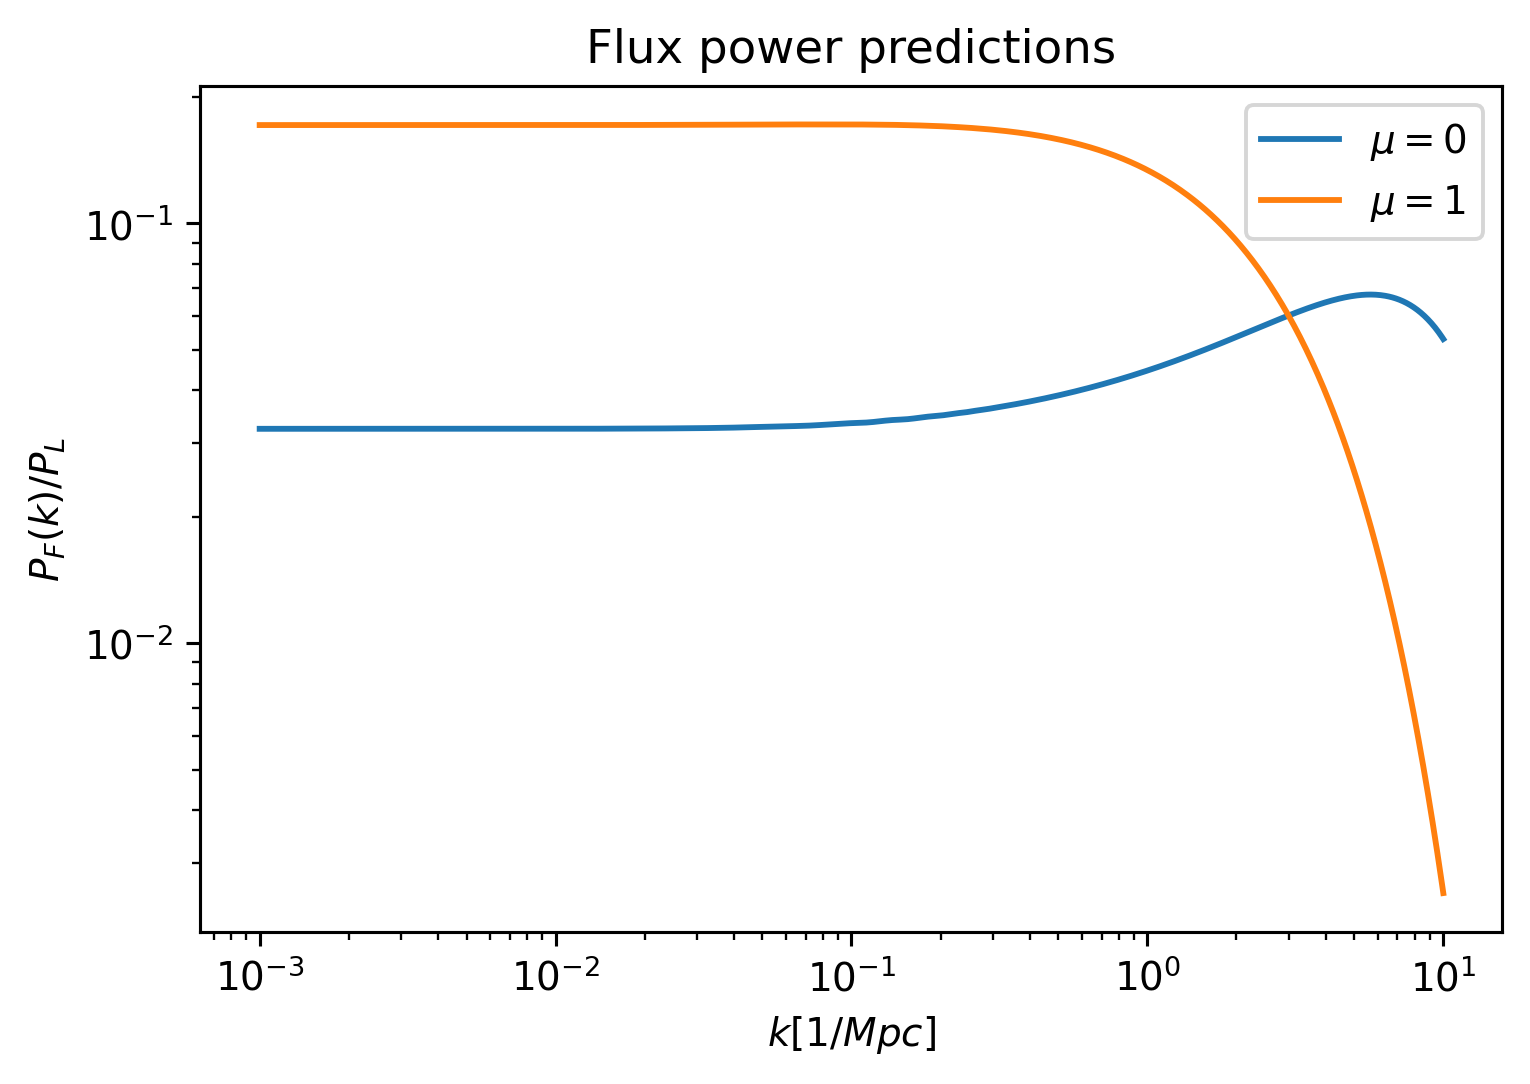

In [6]:
# repeat plot for ratios 
plt.title(r"Flux power predictions")
plt.xlabel(r"$k [1/Mpc]$")
plt.ylabel(r"$P_F(k)/P_L$")
plt.loglog(lin_k,arinyo.P3D_Mpc(z,lin_k,mu=0.0)/lin_p,label=r'$\mu=0$')
plt.loglog(lin_k,arinyo.P3D_Mpc(z,lin_k,mu=1.0)/lin_p,label=r'$\mu=1$')
plt.legend();